# Pandas Demo

## Converting large data frames into digestable information

### LSAA - ODC Intersections

- Cloud AWS
    - S3 storage characteristics
    - Compute and Orchestration Models
        - Swarm
        - Batch
        - Lambda
        - Kubernetes
        - ECS
        - Mesos
        - Virtualization vs. Containers
    - Cloud formation templates
    - Security best practices
- Python
    - Clean Code
        - 12 factor applications
        - cloud native applications
        - PEP
    - Code Models
        - Structured Programmin
        - OOP
        - Functional Programing
    - Cloud Ready Code
    - Refernce Architectures
        - microservices vs. monoliths
    - Disk Models
        - DASK
    - Memory Data Structures
        - numpy - numerical N-dimensional arrays - plus methods, attributes
        - pandas - dataframes
        - xarray - datasets and dataArrays
        - zarray - new 
- Jupyter
- Image and Data Distribution
    - COGS and COG Recipes
- Science
- Tools and Practices

## Process - 
- develop a charter to define scope - track results

In [1]:
import pandas

In [2]:
df = pandas.read_csv('awsLink/workCopy.csv', sep=',')

/home/butzer/venv/lib/python3.4/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (28,29,30,31,32,33,34,36,48) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.shape

(166505, 70)

# holy cow - one hundred and 60 THOUSAND line/rows -- WHOA!

## Markdown is cool

### Learn Markdown and conquer the world!

In [4]:
df.columns

Index(['SKU', 'OfferTermCode', 'RateCode', 'TermType', 'PriceDescription',
       'EffectiveDate', 'StartingRange', 'EndingRange', 'Unit', 'PricePerUnit',
       'Currency', 'LeaseContractLength', 'PurchaseOption', 'OfferingClass',
       'Product Family', 'serviceCode', 'Location', 'Location Type',
       'Instance Type', 'Current Generation', 'Instance Family', 'vCPU',
       'Physical Processor', 'Clock Speed', 'Memory', 'Storage',
       'Network Performance', 'Processor Architecture', 'Storage Media',
       'Volume Type', 'Max Volume Size', 'Max IOPS/volume',
       'Max IOPS Burst Performance', 'Max throughput/volume', 'Provisioned',
       'Tenancy', 'EBS Optimized', 'Operating System', 'License Model',
       'Group', 'Group Description', 'Transfer Type', 'From Location',
       'From Location Type', 'To Location', 'To Location Type', 'usageType',
       'operation', 'Comments', 'Dedicated EBS Throughput', 'ECU',
       'Enhanced Networking Supported', 'GPU', 'Instance Capacit

In [5]:
subset = df[['Location', 'Instance Type', 'vCPU', 'Operating System', 'Instance Family', 'Tenancy', 'Memory', 'LeaseContractLength', 'Unit', 'PricePerUnit', 'TermType', 'Currency', 'PurchaseOption']] # subset multiple columns

In [6]:
type(subset)

pandas.core.frame.DataFrame

In [7]:
subset.head()

,Location,Instance Type,vCPU,Operating System,Instance Family,Tenancy,Memory,LeaseContractLength,Unit,PricePerUnit,TermType,Currency,PurchaseOption
0,US East (Ohio),m4.xlarge,4.0,RHEL,General purpose,Dedicated,16 GiB,1yr,Hrs,0.2230,Reserved,USD,No Upfront
1,EU (Frankfurt),r4.16xlarge,64.0,Windows,Memory optimized,Shared,488 GiB,3yr,Hrs,6.6146,Reserved,USD,No Upfront
2,Asia Pacific (Seoul),i2.4xlarge,16.0,Windows,Storage optimized,Dedicated,122 GiB,NaN,Hrs,5.1382,OnDemand,USD,NaN
3,Asia Pacific (Singapore),m3.2xlarge,8.0,Windows,General purpose,Dedicated,30 GiB,1yr,Hrs,1.0070,Reserved,USD,Partial Upfront
4,Asia Pacific (Sydney),m1.medium,1.0,RHEL,General purpose,Shared,3.75 GiB,1yr,Quantity,1080.0000,Reserved,USD,All Upfront


# what does the above look like
- kind of like a spreadsheet - that's  right a pand data frame

In [8]:
subset.shape

(166505, 13)

In [9]:
subset['Tenancy'].value_counts()

Shared       84502
Dedicated    75353
Host          5364
Name: Tenancy, dtype: int64

In [10]:
%matplotlib inline

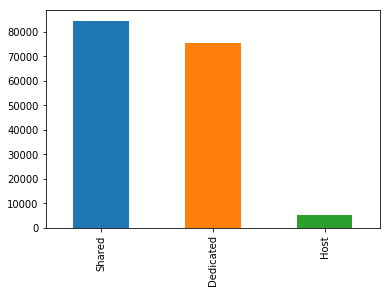

In [11]:
subset['Tenancy'].value_counts().plot(kind='bar')

In [12]:
t2_nano=subset[subset['Instance Type'] == "t2.nano"]

In [13]:
t2_nano[:6]

,Location,Instance Type,vCPU,Operating System,Instance Family,Tenancy,Memory,LeaseContractLength,Unit,PricePerUnit,TermType,Currency,PurchaseOption
126,Asia Pacific (Seoul),t2.nano,1.0,Windows,General purpose,Shared,0.5 GiB,3yr,Quantity,179.0000,Reserved,USD,All Upfront
515,Asia Pacific (Mumbai),t2.nano,1.0,Linux,General purpose,Shared,0.5 GiB,3yr,Hrs,0.0027,Reserved,USD,Partial Upfront
518,South America (Sao Paulo),t2.nano,1.0,Linux,General purpose,Shared,0.5 GiB,3yr,Hrs,0.0026,Reserved,USD,Partial Upfront
685,South America (Sao Paulo),t2.nano,1.0,Linux,General purpose,Shared,0.5 GiB,1yr,Hrs,0.0062,Reserved,USD,No Upfront
691,US East (N. Virginia),t2.nano,1.0,Windows,General purpose,Shared,0.5 GiB,3yr,Quantity,66.0000,Reserved,USD,Partial Upfront
695,Asia Pacific (Seoul),t2.nano,1.0,SUSE,General purpose,Shared,0.5 GiB,3yr,Quantity,301.0000,Reserved,USD,All Upfront


In [14]:
t2_nano.columns

Index(['Location', 'Instance Type', 'vCPU', 'Operating System',
       'Instance Family', 'Tenancy', 'Memory', 'LeaseContractLength', 'Unit',
       'PricePerUnit', 'TermType', 'Currency', 'PurchaseOption'],
      dtype='object')

In [15]:
t2_nano_jr = t2_nano[['Location', 'Operating System', 'LeaseContractLength', 'Unit', 'PricePerUnit', 'Currency','PurchaseOption']]

In [16]:
t2_nano_jr[:7]

,Location,Operating System,LeaseContractLength,Unit,PricePerUnit,Currency,PurchaseOption
126,Asia Pacific (Seoul),Windows,3yr,Quantity,179.0000,USD,All Upfront
515,Asia Pacific (Mumbai),Linux,3yr,Hrs,0.0027,USD,Partial Upfront
518,South America (Sao Paulo),Linux,3yr,Hrs,0.0026,USD,Partial Upfront
685,South America (Sao Paulo),Linux,1yr,Hrs,0.0062,USD,No Upfront
691,US East (N. Virginia),Windows,3yr,Quantity,66.0000,USD,Partial Upfront
695,Asia Pacific (Seoul),SUSE,3yr,Quantity,301.0000,USD,All Upfront
828,US West (N. California),SUSE,3yr,Quantity,296.0000,USD,All Upfront


In [17]:
t2_nano_jr.head(9)

,Location,Operating System,LeaseContractLength,Unit,PricePerUnit,Currency,PurchaseOption
126,Asia Pacific (Seoul),Windows,3yr,Quantity,179.0000,USD,All Upfront
515,Asia Pacific (Mumbai),Linux,3yr,Hrs,0.0027,USD,Partial Upfront
518,South America (Sao Paulo),Linux,3yr,Hrs,0.0026,USD,Partial Upfront
685,South America (Sao Paulo),Linux,1yr,Hrs,0.0062,USD,No Upfront
691,US East (N. Virginia),Windows,3yr,Quantity,66.0000,USD,Partial Upfront
695,Asia Pacific (Seoul),SUSE,3yr,Quantity,301.0000,USD,All Upfront
828,US West (N. California),SUSE,3yr,Quantity,296.0000,USD,All Upfront
1459,US East (Ohio),SUSE,NaN,Hrs,0.0159,USD,NaN
1771,US West (N. California),Linux,3yr,Hrs,0.0000,USD,All Upfront


In [18]:
t2_nano_1yr=t2_nano_jr[t2_nano_jr['LeaseContractLength'] == "1yr"]

In [19]:
t2_nano_1yr.shape

(225, 7)

In [20]:
t2_nano_1yr_linux=t2_nano_1yr[t2_nano_1yr['Operating System'] == "Linux"]

In [21]:
#t2_nano_1yr_linux[:10]

In [22]:
t2_nano_tony=t2_nano_1yr_linux[t2_nano_1yr_linux['Unit'] == "Quantity"]

In [23]:
#t2_nano_tony

In [24]:
t2_s = t2_nano_tony.sort_values('Location')

In [25]:
t2_s[3:7]

,Location,Operating System,LeaseContractLength,Unit,PricePerUnit,Currency,PurchaseOption
26115,Asia Pacific (Mumbai),Linux,1yr,Quantity,47.0,USD,All Upfront
113874,Asia Pacific (Seoul),Linux,1yr,Quantity,51.0,USD,All Upfront
42007,Asia Pacific (Seoul),Linux,1yr,Quantity,26.0,USD,Partial Upfront
148280,Asia Pacific (Singapore),Linux,1yr,Quantity,48.0,USD,All Upfront


In [26]:
t2_a = t2_s[t2_s['PurchaseOption'] == "All Upfront"]

In [27]:
t2_a.shape

(15, 7)

In [28]:
t2_a

,Location,Operating System,LeaseContractLength,Unit,PricePerUnit,Currency,PurchaseOption
124313,AWS GovCloud (US),Linux,1yr,Quantity,39.0,USD,All Upfront
26115,Asia Pacific (Mumbai),Linux,1yr,Quantity,47.0,USD,All Upfront
113874,Asia Pacific (Seoul),Linux,1yr,Quantity,51.0,USD,All Upfront
148280,Asia Pacific (Singapore),Linux,1yr,Quantity,48.0,USD,All Upfront
148954,Asia Pacific (Sydney),Linux,1yr,Quantity,52.0,USD,All Upfront
15792,Asia Pacific (Tokyo),Linux,1yr,Quantity,51.0,USD,All Upfront
19919,Canada (Central),Linux,1yr,Quantity,38.0,USD,All Upfront
148574,EU (Frankfurt),Linux,1yr,Quantity,40.0,USD,All Upfront
67152,EU (Ireland),Linux,1yr,Quantity,37.0,USD,All Upfront
5726,EU (London),Linux,1yr,Quantity,39.0,USD,All Upfront


In [29]:
t2_f = t2_a[['Location', 'PricePerUnit']]

In [30]:
#t2_f

In [31]:
t2_cheap = t2_f.sort_values('PricePerUnit')

In [32]:
t2_cheap

,Location,PricePerUnit
50615,US East (N. Virginia),34.0
104335,US East (Ohio),34.0
41003,US West (Oregon),34.0
67152,EU (Ireland),37.0
19919,Canada (Central),38.0
124313,AWS GovCloud (US),39.0
5726,EU (London),39.0
148574,EU (Frankfurt),40.0
126658,US West (N. California),45.0
26115,Asia Pacific (Mumbai),47.0


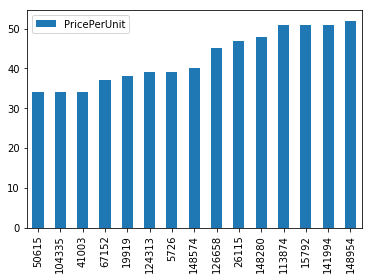

In [33]:
t2_cheap.plot(kind='bar')

In [34]:
#t2_cheap.plot(y='PricePerUnit', kind="bar")

In [35]:
#t2_cheap.plot(x='Location', y='PricePerUnit', kind="bar")

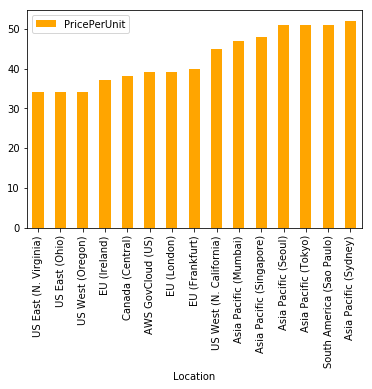

In [36]:
t2_cheap.plot(x='Location', y='PricePerUnit', kind="bar", color='orange')

In [37]:
abc = subset.groupby('Location')['Instance Type'].count()

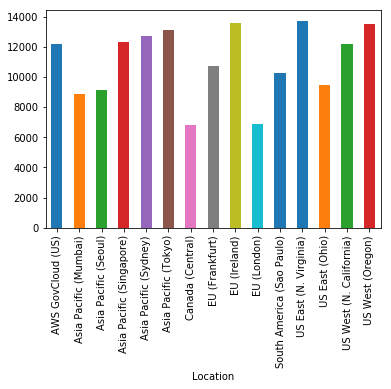

In [38]:
subset.groupby('Location')['Instance Type'].count().plot(kind='bar')

In [39]:
abc

Location
AWS GovCloud (US)            12183
Asia Pacific (Mumbai)         8895
Asia Pacific (Seoul)          9115
Asia Pacific (Singapore)     12308
Asia Pacific (Sydney)        12733
Asia Pacific (Tokyo)         13114
Canada (Central)              6836
EU (Frankfurt)               10755
EU (Ireland)                 13609
EU (London)                   6866
South America (Sao Paulo)    10246
US East (N. Virginia)        13730
US East (Ohio)                9496
US West (N. California)      12208
US West (Oregon)             13525
Name: Instance Type, dtype: int64

In [40]:
type(abc)

pandas.core.series.Series

In [41]:
dir(abc)

['T',
 '_AXIS_ALIASES',
 '_AXIS_IALIASES',
 '_AXIS_LEN',
 '_AXIS_NAMES',
 '_AXIS_NUMBERS',
 '_AXIS_ORDERS',
 '_AXIS_REVERSED',
 '_AXIS_SLICEMAP',
 '__abs__',
 '__add__',
 '__and__',
 '__array__',
 '__array_prepare__',
 '__array_priority__',
 '__array_wrap__',
 '__bool__',
 '__bytes__',
 '__class__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__div__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__finalize__',
 '__float__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__imod__',
 '__imul__',
 '__init__',
 '__int__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__long__',
 '__lt__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__pow__',
 '__radd__',
 '__rand__',


In [42]:
abc.all

<bound method Series.all of Location
AWS GovCloud (US)            12183
Asia Pacific (Mumbai)         8895
Asia Pacific (Seoul)          9115
Asia Pacific (Singapore)     12308
Asia Pacific (Sydney)        12733
Asia Pacific (Tokyo)         13114
Canada (Central)              6836
EU (Frankfurt)               10755
EU (Ireland)                 13609
EU (London)                   6866
South America (Sao Paulo)    10246
US East (N. Virginia)        13730
US East (Ohio)                9496
US West (N. California)      12208
US West (Oregon)             13525
Name: Instance Type, dtype: int64>

In [43]:
abc.min()

6836

In [44]:
abc.max()

13730

In [45]:
abc

Location
AWS GovCloud (US)            12183
Asia Pacific (Mumbai)         8895
Asia Pacific (Seoul)          9115
Asia Pacific (Singapore)     12308
Asia Pacific (Sydney)        12733
Asia Pacific (Tokyo)         13114
Canada (Central)              6836
EU (Frankfurt)               10755
EU (Ireland)                 13609
EU (London)                   6866
South America (Sao Paulo)    10246
US East (N. Virginia)        13730
US East (Ohio)                9496
US West (N. California)      12208
US West (Oregon)             13525
Name: Instance Type, dtype: int64

In [46]:
plot_data = abc.sort_values()

In [47]:
plot_data

Location
Canada (Central)              6836
EU (London)                   6866
Asia Pacific (Mumbai)         8895
Asia Pacific (Seoul)          9115
US East (Ohio)                9496
South America (Sao Paulo)    10246
EU (Frankfurt)               10755
AWS GovCloud (US)            12183
US West (N. California)      12208
Asia Pacific (Singapore)     12308
Asia Pacific (Sydney)        12733
Asia Pacific (Tokyo)         13114
US West (Oregon)             13525
EU (Ireland)                 13609
US East (N. Virginia)        13730
Name: Instance Type, dtype: int64

In [48]:
!date

Mon Jul 30 10:50:13 CDT 2018


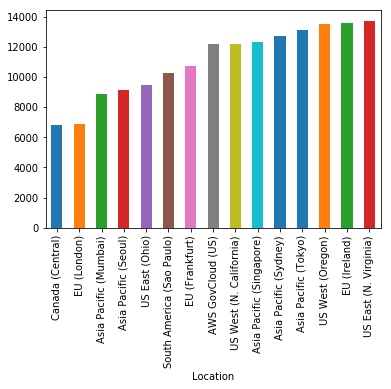

In [49]:
plot_data.plot(kind='bar')

In [50]:
oregon=subset[subset['Location'] == "US West (Oregon)"]

In [51]:
oregon.shape

(13547, 13)

In [52]:
oregon['Location'].head(10)

7      US West (Oregon)
37     US West (Oregon)
39     US West (Oregon)
44     US West (Oregon)
58     US West (Oregon)
64     US West (Oregon)
89     US West (Oregon)
93     US West (Oregon)
97     US West (Oregon)
166    US West (Oregon)
Name: Location, dtype: object

In [53]:
oregon['Instance Type'].head(10)

7       c4.xlarge
37       t2.micro
39     c3.2xlarge
44     m2.4xlarge
58     c4.4xlarge
64       r3.large
89     c4.4xlarge
93     r3.8xlarge
97     d2.4xlarge
166    g2.2xlarge
Name: Instance Type, dtype: object

In [54]:
location_flavor_list = oregon['Instance Type']
for flav in location_flavor_list:
    flavstr = str(flav)
    if 'micro' in flavstr:
        print(flav)

t2.micro
t2.micro
t2.micro
t2.micro
t1.micro
t2.micro
t2.micro
t2.micro
t2.micro
t2.micro
t2.micro
t2.micro
t2.micro
t2.micro
t1.micro
t2.micro
t2.micro
t2.micro
t1.micro
t2.micro
t2.micro
t1.micro
t1.micro
t2.micro
t1.micro
t2.micro
t2.micro
t1.micro
t1.micro
t1.micro
t2.micro
t2.micro
t1.micro
t1.micro
t2.micro
t2.micro
t1.micro
t1.micro
t2.micro
t1.micro
t2.micro
t2.micro
t2.micro
t2.micro
t2.micro
t2.micro
t1.micro
t2.micro
t1.micro
t1.micro
t1.micro
t1.micro
t1.micro
t2.micro
t1.micro
t2.micro
t1.micro
t2.micro
t1.micro
t2.micro
t1.micro
t2.micro
t1.micro
t2.micro
t2.micro
t1.micro
t2.micro
t2.micro
t1.micro
t2.micro
t2.micro
t2.micro
t1.micro
t2.micro
t1.micro
t2.micro
t2.micro
t2.micro
t1.micro
t1.micro
t1.micro
t1.micro
t2.micro
t2.micro
t2.micro
t1.micro
t1.micro
t1.micro
t2.micro
t1.micro
t2.micro
t1.micro
t2.micro
t1.micro
t2.micro
t2.micro
t2.micro
t2.micro
t2.micro
t1.micro
t1.micro
t1.micro
t2.micro
t2.micro
t2.micro
t1.micro
t2.micro
t2.micro
t2.micro
t2.micro
t1.micro
t

# Why more than one t2.micro in oregon

- OS?
- Lease vs. Buy etc

> why the code below; why the extra step ?

``` flavstr = str(flav) ```

In [55]:
location_flavor_list

7           c4.xlarge
37           t2.micro
39         c3.2xlarge
44         m2.4xlarge
58         c4.4xlarge
64           r3.large
89         c4.4xlarge
93         r3.8xlarge
97         d2.4xlarge
166        g2.2xlarge
169       g3.16xlarge
185         i3.xlarge
189        r4.8xlarge
195       x1.16xlarge
197        r4.4xlarge
235          c3.large
243          c3.large
264         i3.xlarge
268          i3.large
313        i2.4xlarge
320         i2.xlarge
331         c3.xlarge
344         i3.xlarge
357        m2.2xlarge
379        c4.8xlarge
446        m3.2xlarge
447        i3.4xlarge
449       hi1.4xlarge
465        m2.2xlarge
516          m3.large
             ...     
166030     m3.2xlarge
166036      m3.xlarge
166052     c3.8xlarge
166067    r4.16xlarge
166111     r3.8xlarge
166116     c4.2xlarge
166122     c3.2xlarge
166128    m4.10xlarge
166133    i3.16xlarge
166194    p2.16xlarge
166221     m4.2xlarge
166241     r4.4xlarge
166274     c4.8xlarge
166278     m2.4xlarge
166285    

In [56]:
! ls awsLink/opt/ga-aws-butzer/python/amazonOverwhelm/amazonPricelistAnalysis.py

awsLink/opt/ga-aws-butzer/python/amazonOverwhelm/amazonPricelistAnalysis.py


In [57]:
!python awsLink/opt/ga-aws-butzer/python/amazonOverwhelm/amazonPricelistAnalysis.py

sys:1: DtypeWarning: Columns (28,29,30,31,32,33,34,36,48) have mixed types. Specify dtype option on import or set low_memory=False.
(166505, 13)
t2.nano
_______________________________________________________________
PICK is t2.nano
TABLE is                           Location  PricePerUnit
50615       US East (N. Virginia)          34.0
104335             US East (Ohio)          34.0
41003            US West (Oregon)          34.0
67152                EU (Ireland)          37.0
19919            Canada (Central)          38.0
124313          AWS GovCloud (US)          39.0
5726                  EU (London)          39.0
148574             EU (Frankfurt)          40.0
126658    US West (N. California)          45.0
26115       Asia Pacific (Mumbai)          47.0
148280   Asia Pacific (Singapore)          48.0
113874       Asia Pacific (Seoul)          51.0
15792        Asia Pacific (Tokyo)          51.0
141994  South America (Sao Paulo)          51.0
148954      Asia Pacific (Sydney)    

In [58]:
!cat awsLink/opt/ga-aws-butzer/python/amazonOverwhelm/amazonPricelistAnalysis.py

import pandas

df = pandas.read_csv('/home/butzer/workCopy.csv', sep=',')

n1 =  df.columns

subset = df[['Location', 'Instance Type', 'vCPU', 'Operating System', 'Instance Family', 'Tenancy', 'Memory', 'LeaseContractLength', 'Unit', 'PricePerUnit', 'TermType', 'Currency', 'PurchaseOption']] # subset multiple columns

print (subset.shape)

subset['Tenancy'].value_counts()

#pick_type = "t2.nano"
#pick_type = "t2.micro"
#pick_type = "t2.small"
pick_type = "t2.large"

pick_list = ['t2.nano', 't2.micro', 't2.small', 't2.large']

for pick in pick_list:
  print(pick)
  pick_type=pick

  print ("_______________________________________________________________")
  print ("PICK is", pick_type)
  t2_nano=subset[subset['Instance Type'] == pick_type]

  t2_nano[:6]

  t2_nano.columns

  t2_nano_jr = t2_nano[['Location', 'Operating System', 'LeaseContractLength', 'Unit', 'PricePerUnit', 'Currency','PurchaseOption']]

  t2_nano_1yr=t2_nano_jr[t2_nano_jr['LeaseContractLength'] == "1yr"]

  t2_nano_1y

In [59]:
! date

Mon Jul 30 10:50:16 CDT 2018
